In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
df_rice = pd.read_csv('Rice.csv')
df_soil = pd.read_csv('Soil.csv')
c1 = df_rice.columns.values[0]
column_names = ['District', 'Block_name', 'Year', 'Yield']
total_rows = df_rice.shape[0]
years = []
k = 2
for i in range(2000, 2017):
  years.append([i, k])
  k += 1
cyear = []
District = []
Block_name = []
Yield = []
df_rice.iloc[1:,0]
curr_district = ""

In [70]:
print(total_rows)

394


In [122]:
print(len(cyear))
def extract_csv(df):
  for year in years:
    for row in range(1, total_rows):
      if df.iloc[row,0][0] == "R":
        curr_district = df.iloc[row,1]
        continue
      else:
        cyear.append(int(year[0]))
        if curr_district == 'A.Nagar':
          curr_district = 'Ahmadnagar'
        District.append(curr_district)
        if df.iloc[row, 1] == 'A.Nagar':
            Block_name.append('Ahmadnagar')
        else:
            Block_name.append(df.iloc[row, 1])
        Yield.append(float(df.iloc[row, year[1]]))
  return cyear, District, Block_name, Yield


0


In [0]:
cyear, District, Block_name, Yield = extract_csv(df_rice)

In [0]:
new_rice = {'District':District, 'Block_name':Block_name, 'Year':cyear, 'Yield':Yield}
df_nrice = pd.DataFrame(new_rice)
df_nrice.head()
df_nrice.to_csv('Restructured_Data.csv', index=False)

In [0]:
import seaborn as sns


def getCrossTab(feature_name, label, dataframe):
  data_ct = pd.crosstab(dataframe[feature_name], dataframe[label], margins = False)
  return data_ct

def drawBoxPlot(feature, label, df_, subplots = False, nrows = 0, ncolumns = 0):
  if not subplots:
    sns.boxplot(x=label, y = feature, data = df_)
  else:
    fig, ax = plt.subplots(nrows, ncolumns, figsize = (15,15))
    fig.subplots_adjust(hspace = 0.8, wspace = 0.8)
    d = 0
    for row in range(nrows):
      for col in range(ncolumns):
        sns.boxplot(x=label, y=feature[d], data=df_, ax = ax[row, col])
        d += 1
        if d >= len(feature):
          return

def drawHist(feature, df_, subplots = False, nrows = 0, ncolumns = 0):
  if not subplots:
    plt.hist(df_[feature])
  else:
    fig, ax = plt.subplots(nrows, ncolumns, figsize = (15,15))
    fig.subplots_adjust(hspace = 0.8, wspace = 0.8)
    d = 0
    for row in range(nrows):
      for col in range(ncolumns):
        ax[row, col].hist(df_[feature[d]])
        ax[row, col].set_xlabel(feature[d])
        d += 1
        if d >= len(feature):
          return

In [0]:
df_nrice.loc[:,'Yield'] = df_nrice['Yield'].astype(dtype = 'float64')

In [0]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
df_nrice['Yield'] = imp.fit_transform(df_nrice['Yield'].values.reshape(-1,1))

In [125]:
df_agg = ((df_nrice.groupby(['District', 'Year'])).mean()).loc[:,['Yield']]
df_agg

Yield
District   Year       
Ahmadnagar 2000  599.0
           2001  500.0
           2002  224.3
           2003  947.1
           2004  836.0
...                ...
Yavatmal   2012    NaN
           2013    NaN
           2014    NaN
           2015    NaN
           2016    NaN

[595 rows x 1 columns]

In [88]:
(df_soil[(df_soil['DISTRICT'] == 'Ratnagiri') & (df_soil['YEAR_OBS']>=2000)]).groupby()

,x,DISTRICT,TEH_NAME,BLOCK_NAME,LAT,LON,SITE_NAME,YEAR_OBS,RAINFALL,GRDWTR,SOIL_TYPE,Soil_Score,Elevation,Indexing
840,MS,Ratnagiri,Guhagar,Dapoli,17.762500,73.191667,Dapoli,2010,4201.70,5.58,Laterite,3,14,16836.54
841,MS,Ratnagiri,Kherdi,Lanja,16.790278,73.575556,Vankhed,2010,4201.70,4.286666667,Laterite,3,12,16831.66
842,MS,Ratnagiri,Khed,Khed,17.766667,73.416667,Kalvane,2010,4201.70,3.89,Laterite,3,616,17132.47
843,MS,Ratnagiri,Guhagar,Dapoli,17.590000,73.176944,Dabhol,2010,4201.70,4.696666667,Laterite,3,14,16833.89
844,MS,Ratnagiri,Guhagar,Dapoli,17.783889,73.238611,Karanjani,2010,4201.70,5.766666667,Laterite,3,14,16837.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13587,MS,Ratnagiri,Nachane,Ratnagiri,16.912500,73.347222,Pomendi (Kh),2000,4619.05,3.9675,Laterite,3,129,18558.6025
13588,MS,Ratnagiri,Rajapur,Rajapur,16.650000,73.516667,Rajapur,2000,4619.05,12.005,Laterite,3,34,18535.215
13589,MS,Ratnagiri,Rajapur,Rajapur,16.655833,73.430556,Solgaon,2000,4619.05,4.8675,Laterite,3,34,18513.8025
13590,MS,Ratnagiri,Rajapur,Rajapur,16.700000,73.700000,Raipatan,2000,4619.05,3.59,Laterite,3,34,18509.97


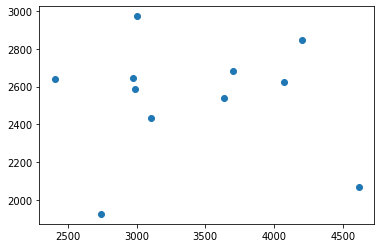

In [113]:
x = (df_soil[(df_soil['DISTRICT'] == 'Ratnagiri') & (df_soil['YEAR_OBS']>=2000)]).groupby(['YEAR_OBS']).mean().loc[:,'RAINFALL']
y = df_nrice[(df_nrice['District'] == 'Ratnagiri') & (df_nrice['Year'] <=2010)].groupby(['Year']).mean().loc[:,['Yield']]
plt.scatter(x,y)

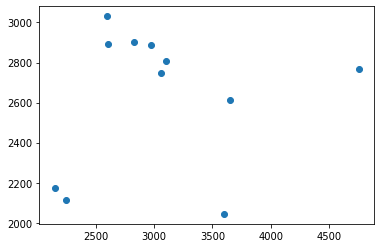

In [114]:
x = (df_soil[(df_soil['DISTRICT'] == 'Sindhudurg') & (df_soil['YEAR_OBS']>=2000)]).groupby(['YEAR_OBS']).mean().loc[:,'RAINFALL']
y = df_nrice[(df_nrice['District'] == 'Sindhudurg') & (df_nrice['Year'] <=2010)].groupby(['Year']).mean().loc[:,['Yield']]
plt.scatter(x,y)

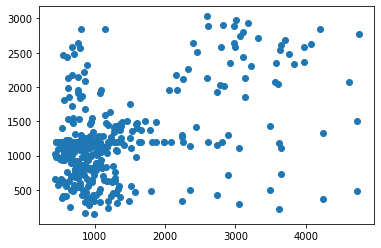

In [115]:
x = (df_soil[(df_soil['YEAR_OBS']>=2000)]).groupby(['DISTRICT','YEAR_OBS']).mean().loc[:,'RAINFALL']
y = df_nrice[(df_nrice['Year'] <=2010)].groupby(['District','Year']).mean().loc[:,['Yield']]
plt.scatter(x,y)

In [129]:
df_soil[df_soil['YEAR_OBS'] >= 2000].shape, df_nrice[df_nrice['Year'] <= 2010].shape

((13955, 14), (3938, 4))

In [132]:
df_soil['SOIL_TYPE']

0        Black
1        Black
2        Black
3        Black
4        Black
         ...  
19021    Black
19022    Black
19023    Black
19024    Black
19025    Black
Name: SOIL_TYPE, Length: 19026, dtype: object

In [14]:
(df_soil.groupby(['DISTRICT', 'YEAR_OBS']).mean()).loc[:,['RAINFALL']]

RAINFALL
DISTRICT   YEAR_OBS          
Ahmadnagar 1996       965.080
           1997       953.641
           1998       940.414
           1999       825.431
           2000       595.302
...                       ...
Yavatmal   2006      1290.000
           2007       796.100
           2008       704.500
           2009       570.000
           2010      1201.700

[525 rows x 1 columns]

In [0]:
df_soil = df_soil.replace('#DIV/0!', 0)
df_soil['GRDWTR'] = df_soil['GRDWTR'].astype('float64')
df_soil['Indexing'] = df_soil['Indexing'].astype('float64')

In [205]:
x = df_soil.groupby(['DISTRICT','BLOCK_NAME','YEAR_OBS']).aggregate({'BLOCK_NAME':'max','DISTRICT':'max','YEAR_OBS':'max','RAINFALL':np.mean, 'GRDWTR':np.mean, 'Indexing':np.mean,'Soil_Score':'max','SOIL_TYPE':'max','Elevation':'max'})
print(x.columns.values)
# x = x.loc[(x['DISTRICT'] == 'Ratnagiri') & (x['YEAR_OBS']>=2000),:]
y = df_nrice
print(x.head(20))

['BLOCK_NAME' 'DISTRICT' 'YEAR_OBS' 'RAINFALL' 'GRDWTR' 'Indexing'
 'Soil_Score' 'SOIL_TYPE' 'Elevation']
                               BLOCK_NAME    DISTRICT  ...  SOIL_TYPE  Elevation
DISTRICT   BLOCK_NAME YEAR_OBS                         ...                      
Ahmadnagar Akola      1996          Akola  Ahmadnagar  ...      Black        649
                      1997          Akola  Ahmadnagar  ...      Black        649
                      1998          Akola  Ahmadnagar  ...      Black        649
                      1999          Akola  Ahmadnagar  ...      Black        649
                      2000          Akola  Ahmadnagar  ...      Black        649
                      2001          Akola  Ahmadnagar  ...      Black        649
                      2002          Akola  Ahmadnagar  ...      Black        649
                      2003          Akola  Ahmadnagar  ...      Black        649
                      2004          Akola  Ahmadnagar  ...      Black        649
   

In [206]:
distsoil = list(set(df_soil['DISTRICT']))
districe = list(set(df_nrice['District']))
matched = []
for k in districe:
  if k in distsoil:
    matched.append(k)
print(matched)
print(len(matched), len(districe))
unmatched = [r for r in districe if r not in matched]
print(unmatched)

['Pune', 'Nashik', 'Dhule', 'Amravati', 'Chandrapur', 'Satara', 'Latur', 'Bhandara', 'Nagpur', 'Yavatmal', 'Osmanabad', 'Wardha', 'Ahmadnagar', 'Jalna', 'Thane', 'Solapur', 'Ratnagiri', 'Aurangabad', 'Nandurbar', 'Washim', 'Akola', 'Kolhapur', 'Hingoli', 'Parbhani', 'Jalgaon', 'Nanded', 'Sindhudurg']
27 35
['Beed', 'Gadchiroli', 'Gondia', 'Sangali', 'Raigad', 'Gr.Bombay', 'Buldhana', 'Palghar']


In [207]:
df_nnrice = df_nrice[(df_nrice['District'].isin(matched)) & (df_nrice['Year'] <= 2010)]
df_nnrice.columns.values

array(['District', 'Block_name', 'Year', 'Yield'], dtype=object)

In [208]:
x = x[x['YEAR_OBS']>=2000]
x = x.rename(columns = {"YEAR_OBS": "Year", "BLOCK_NAME":"Block_name", "DISTRICT":"District"})
x.columns.values

array(['Block_name', 'District', 'Year', 'RAINFALL', 'GRDWTR', 'Indexing',
       'Soil_Score', 'SOIL_TYPE', 'Elevation'], dtype=object)

In [239]:
merged = pd.merge(x, df_nnrice, on = ["Year", "Block_name", "District"])
print(merged)

     Block_name    District  Year  ...  SOIL_TYPE  Elevation    Yield
0         Akola  Ahmadnagar  2000  ...      Black        649   599.00
1         Akola  Ahmadnagar  2001  ...      Black        649   500.00
2         Akola  Ahmadnagar  2002  ...      Black        649   224.30
3         Akola  Ahmadnagar  2003  ...      Black        649   947.10
4         Akola  Ahmadnagar  2004  ...      Black        649   836.00
...         ...         ...   ...  ...        ...        ...      ...
2142   Yavatmal    Yavatmal  2006  ...      Black        457   431.00
2143   Yavatmal    Yavatmal  2007  ...      Black        457   831.00
2144   Yavatmal    Yavatmal  2008  ...      Black        457  1203.75
2145   Yavatmal    Yavatmal  2009  ...      Black        457  1203.75
2146   Yavatmal    Yavatmal  2010  ...      Black        457  1203.75

[2147 rows x 10 columns]


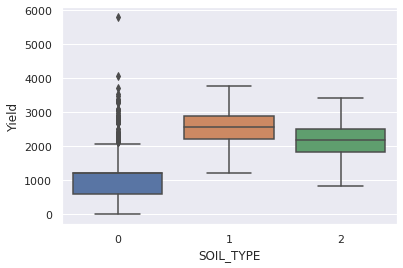

In [244]:
%matplotlib inline
drawBoxPlot('Yield', 'SOIL_TYPE', merged)

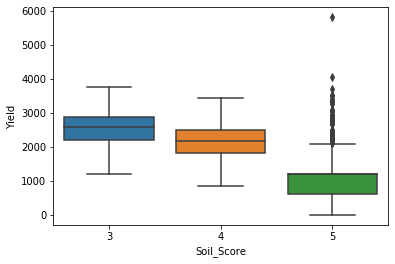

In [214]:
drawBoxPlot('Yield', 'Soil_Score', merged)

The dots in the plots above are indicative of outliers

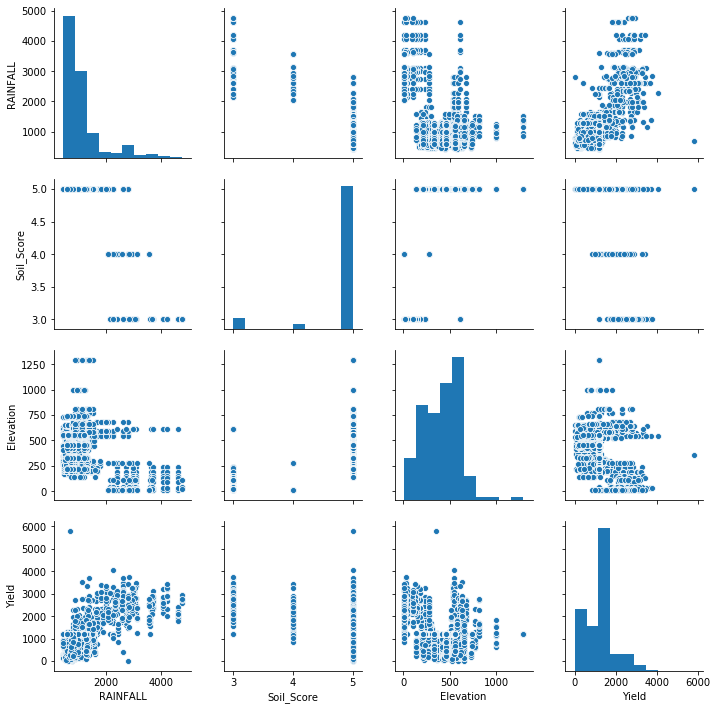

In [217]:
columns = ['RAINFALL', 'SOIL_TYPE', 'Soil_Score', 'Elevation', 'Yield']
sns.pairplot(merged[columns])

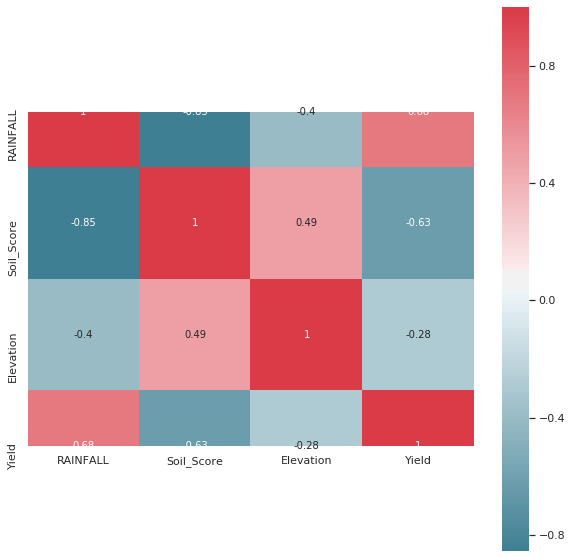

In [229]:
%matplotlib inline
sns.set(font_scale = 1)
cmap_, ax = plt.subplots(figsize = (10,10))
corr = merged[columns].corr(method = 'pearson')
# cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, cmap = cmap, square = True, 
            ax=ax, annot=True,
           annot_kws = {'fontsize': 10})

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
mm = MinMaxScaler()
le = LabelEncoder()
merged['SOIL_TYPE'] = le.fit_transform(merged['SOIL_TYPE'])
# merged[[k for k in columns if k != 'SOIL_TYPE']] = mm.fit(merged[[k for k in columns if k != 'SOIL_TYPE']])
X_train, X_test, y_train, y_test =train_test_split(merged[columns[:-1]], merged['Yield'], test_size = 0.2)
rf = RandomForestRegressor(max_depth = 10, n_estimators = 100, random_state= False, verbose=4)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=False,
                      verbose=4, warm_start=False)

In [243]:
from sklearn import metrics
y_pred = rf.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

186523.4523391695
431.8836097135078


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
